# PCR and PLS

The materials used in this tutorial are based on the applied exercises provided in the book "An Introduction to Statistical Learning with Applications in R" (ISLR). We are trying to demonstrate how to implement the following methods to deal with the curse of dimensionality:
* Principle Component Regression (PCR)
* Partial Least Squares (PLS)
    
We have discussed that if the number of predictors is approximately equal to or larger than the number of observations, we can easily yield an over-fitted model. The problem of high dimension is very common in, for example, image processing, bio-informatics, etc. In the following exercises, we will show you how to use PCA and PLS.


## 1. Predict the number of applications in the College data

In the last tutorial, we how demonstrate how to penalize the linear regression with $L_1$ and $L_2$ regularization. In this exercise, we will predict the number of applications received using the other variables in the College data set with PCA and PLS.

In [1]:
library(ISLR)
data(College)

In [2]:
help(College)

In [3]:
summary(College)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

### 1.1 Split the data set into a training set and a test set. 
As what we usually do, we should split the whole data set into a training set and a test set. We then fit our model on the training set and test its performance on the test set. Here, we randomly choose half of the data to be training data, the other half to be test data.

In [4]:
set.seed(1)
# Randomly sample 
train = sample(1:dim(College)[1], dim(College)[1] / 2)
test <- -train 
College.train <- College[train, ]
College.test <- College[test, ]

### 1.2 Fit a PCR model

Fit a PCR model on the training set, with M chosen by cross-validation. Report the test error obtained, along with the value of M selected by cross-validation. In this task, the R library that you need is <a href="https://cran.r-project.org/web/packages/pls/pls.pdf">pls</a>. If you would like to know more about the usage of pls, you can read Sections 3 to 8 of <a href="https://cran.r-project.org/web/packages/pls/vignettes/pls-manual.pdf">"Introduction to the pls Package"</a>.


In [8]:
library(pls)
# install.packages("pls", repos = 'http://cran.us.r-project.org')

A typical way of fitting a PCR model with cross-validation is to use the <font color="blue">pcr()</font> function, to see the usage of the function please type 

In [9]:
help(pcr)

According to the usage of <font color="blue">pcr()</font>, write your fitting code

In [10]:
fit.pcr <- pcr(Apps ~ ., data = College.train, scale = TRUE, validation = "CV")
summary(fit.pcr) 

Data: 	X dimension: 388 17 
	Y dimension: 388 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            4335     4194     2363     2378     2106     1858     1858
adjCV         4335     4194     2359     2379     1892     1845     1850
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1859     1867     1824      1822      1824      1829      1837
adjCV     1852     1860     1815      1814      1815      1821      1828
       14 comps  15 comps  16 comps  17 comps
CV         1830      1819      1267      1285
adjCV      1823      1790      1255      1272

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X      31.216    57.68    64.73    70.55    76.33    81.30    85.01    88.40
Apps    6.976    71.47    71.58    83.32    83.44    83.45    83.46    83.4

In the summary, there are two main results, namely the validation error and the cumulative percentage of variance explained using n components. The cross validation results are computed for each number of components used so that you can easily check the score with a particular number of components. The validation results are Root Mean Squared Error of Prediction (RMSEP). There are two cross-validation estimates: CV is the ordinary CV estimate, and adjCV is a bias-corrected CV estimate. Note that the percentage of variance explained in the predictors and in the response using different $M$ increases as $M$ increases.

If is often simpler to judge the RMSEPs by plotting them, one way to do that
is to use 
```r
plot(RMSEP(fit.pcr), legendpos="topright")
```
Instead, you can use the <font color="blue">validationplot()</font> function.

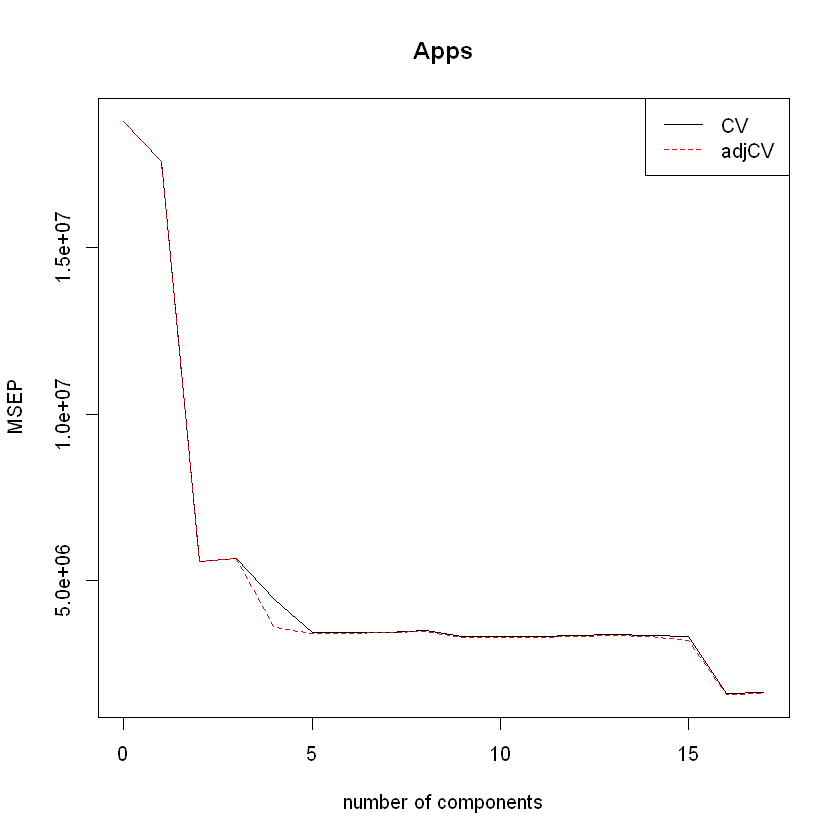

In [11]:
validationplot(fit.pcr, val.type = "MSEP", legendpos="topright")
#help(validationplot)

The plot shows that the smallest cross-validation error occurs when $M = 16$, which is only one less than the total number of predictors in the data set. We might think about just performing least squares.

Now, we have found the lowest cross-validation error occurs when $M= 16$ components are used. We can compute the test MSE as follows

In [12]:
pred.pcr <- predict(fit.pcr, College.test, ncomp = 16)
mean((pred.pcr - College.test$Apps)^2)

[1] 1166897

Compared with the MSE derived by Lasso and Ridge regression, the MSE given by PCR is larger. In this case, one might just choose to use either Lasso or Ridge regression.

### 1.3  FIT a PLS model
Similar to what you have done with PCR, fit a PLS model on the training set, with M chosen by cross-validation. Report the test error obtained, along with the value of M selected by cross-validation.

To do so, you need the <font color="blue"> plsr()</font> function, and remember to print out the summary.


In [13]:
fit.pls <- plsr(Apps ~ ., data = College.train, scale = TRUE, validation = "CV")
summary(fit.pls)

Data: 	X dimension: 388 17 
	Y dimension: 388 1
Fit method: kernelpls
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            4335     2196     1894     1752     1672     1496     1416
adjCV         4335     2188     1891     1743     1636     1461     1393
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1395     1398     1386      1384      1384      1385      1384
adjCV     1374     1377     1366      1365      1365      1366      1365
       14 comps  15 comps  16 comps  17 comps
CV         1385      1385      1385      1385
adjCV      1365      1366      1366      1366

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       26.91    43.08    63.26    65.16    68.50    73.75    76.10    79.03
Apps    76.64    83.93    87.14    91.90    93.49    93.85    93.91    

Similarly, we can also plot the MSEP as a function of $M$ with the <font color="blue">validationplot()</font>

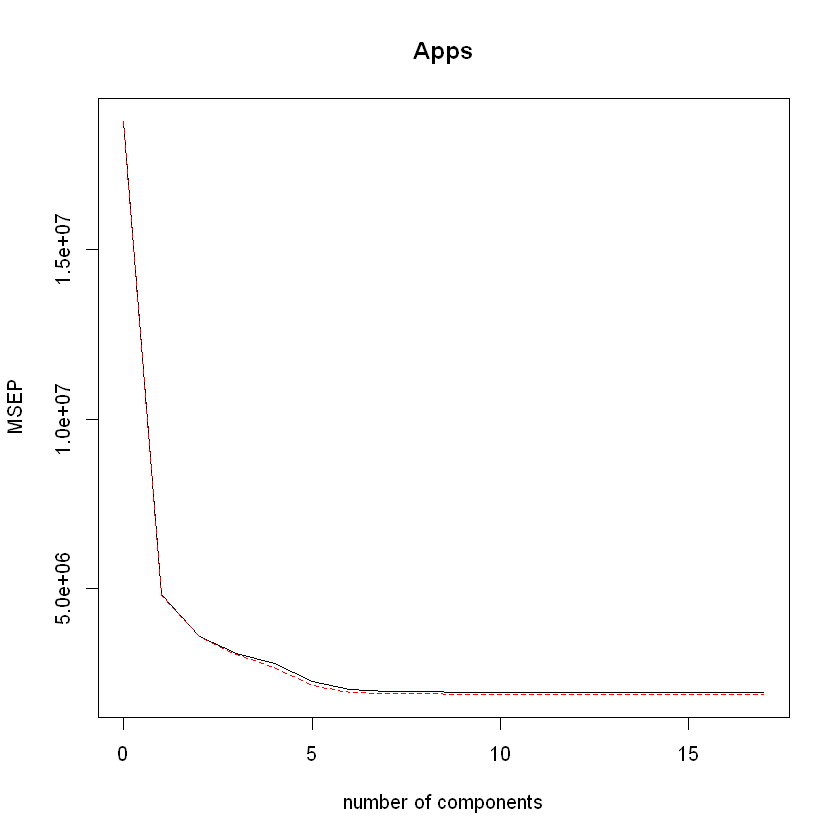

In [14]:
validationplot(fit.pls, val.type = "MSEP")

The plot shows that MSEP drops sharply while M changes from 1 to 5. After that, adding more component does not improve the MSEP too much. Here we are going to choose $M=10$ and compute the test MSE.

In [15]:
pred.pls <- predict(fit.pls, College.test, ncomp = 10)
mean((pred.pls - College.test$Apps)^2)

[1] 1134531

The PLS model yielded lower MSE than did the PCR model.

You have seen how to use the <font color="blue">validationplot</font> to assess how many components are optimal. Actually, there are some other plots that we can use to diagnose the fitted models. For example,

* Plots of the regression coefficients or loadings

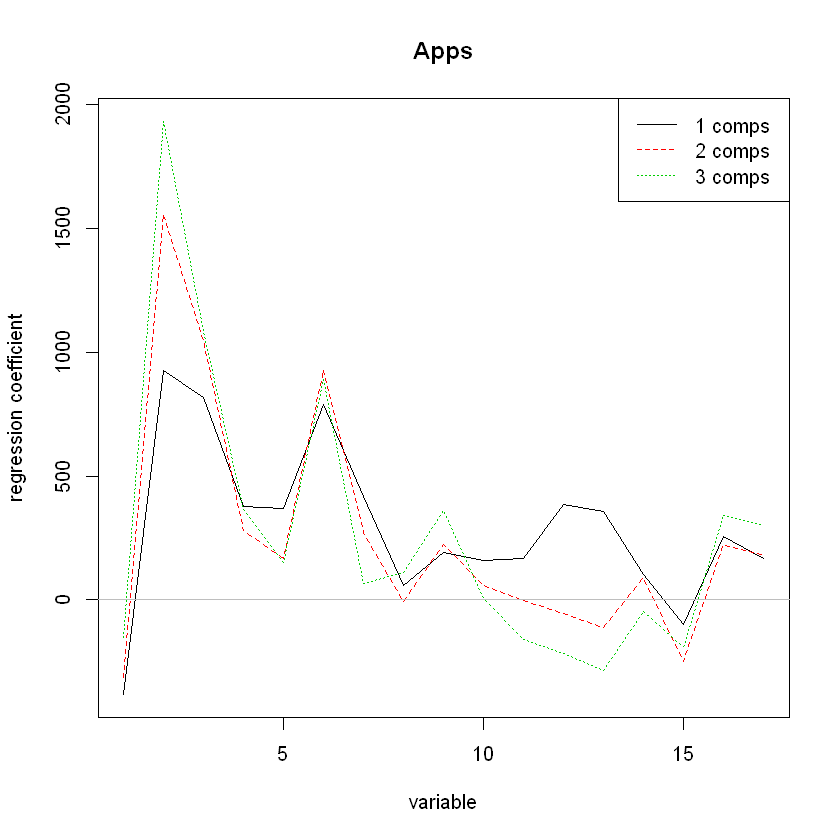

In [16]:
plot(fit.pls, plottype="coef", ncomp= 1:3, legendpos="topright")

The above figure shows plots of the regression vectors for several different number of components at once. The plots describes how strongly each component in the PLSR depends on the original variables, and in what direction. 

In the case of PCR, we can plot the loading vector for each component.

* Score plots


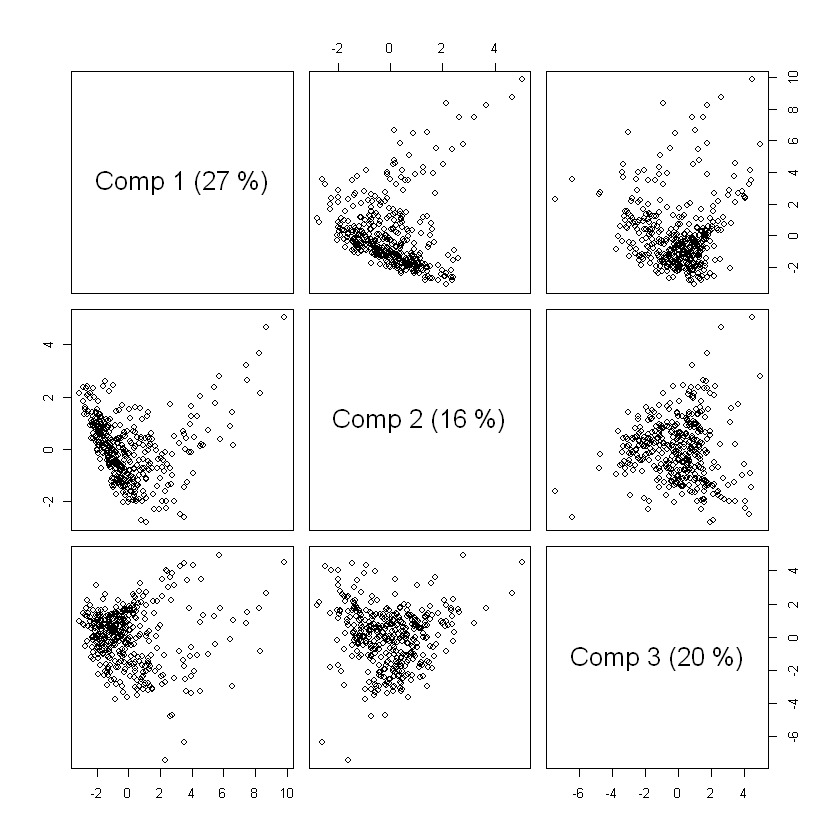

In [17]:
plot(fit.pls, comps=1:3, plottype="scores")

Score plots are often used to look for patterns, groups or outliers in the data. The numbers in parentheses after the component labels are the relative amount of X variance explained by each component. The explained variances can be extracted explicitly with

In [18]:
explvar(fit.pls)

Comp 1    Comp 2    Comp 3    Comp 4    Comp 5    Comp 6    Comp 7    Comp 8 
26.914449 16.164367 20.179319  1.906234  3.333418  5.249324  2.351201  2.928259 
   Comp 9   Comp 10   Comp 11   Comp 12   Comp 13   Comp 14   Comp 15   Comp 16 
 2.728680  3.654254  3.615966  2.354744  1.933545  2.118518  1.976523  1.371739 
  Comp 17 
 1.219459

For more dicussions on inspecting fitted models, please refer to Section 7 of <a href="https://cran.r-project.org/web/packages/pls/vignettes/pls-manual.pdf">"Introduction to the pls Package"</a>.

##  2. Predict per capital crime crate in the "Boston" data set

In this exercise, we are going to investigate the methods discussed in this week and week 5. 

In [19]:
require("MASS")
require("glmnet")

Loading required package: MASS
Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



Firstly, split the data set into a training set and a test set.

In [20]:
set.seed(0)
train = sample(c(TRUE,FALSE), dim(Boston)[1], rep=TRUE)
test = (!train)

Boston_train = Boston[train,]
Boston_test = Boston[test,]

In the rest of the task, you are going to 
1. Try out some of the regression methods such as the lasso, ridge regression,  PCR and PLSR Present and discuss results for the approaches that you consider.
1. Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, cross-validation, or some other reasonable alternative, as opposed to using training error.
1. Does your chosen model involve all of the features in the data set? Why or why not? 

Let's start with Ridge regression model

[1] "ridge regression CV best value of lambda (one standard error): 477.250"


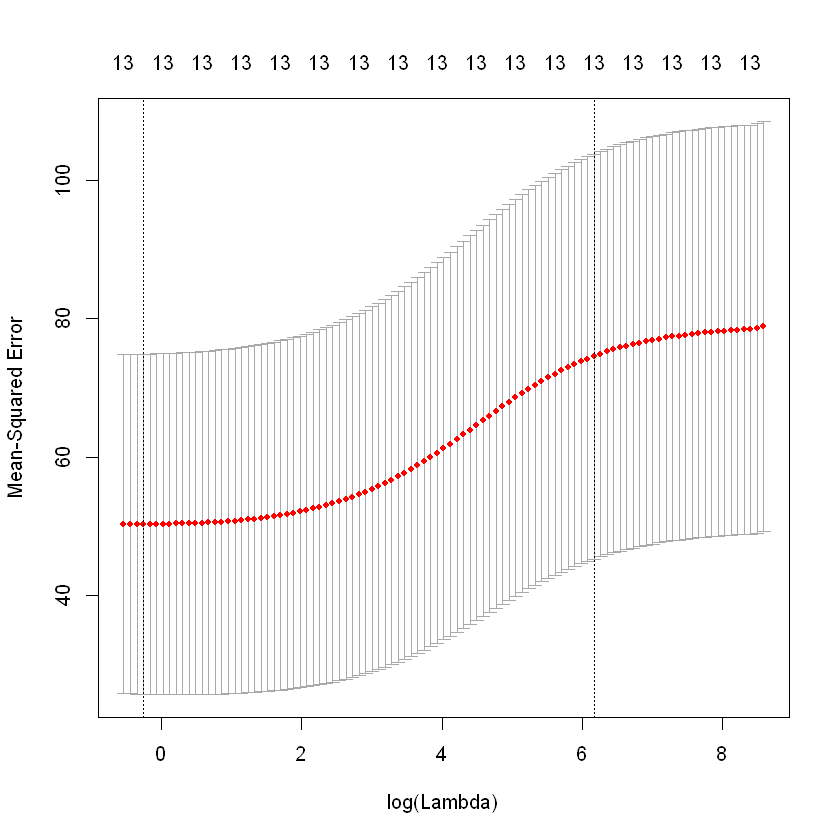

In [21]:
Y = Boston_train$crim 
MM = model.matrix( crim ~ ., data=Boston_train )
cv.out = cv.glmnet(MM, Y, alpha=0 )
plot(cv.out) 
bestlam = cv.out$lambda.1se
print(sprintf("ridge regression CV best value of lambda (one standard error): %.3f", bestlam))

Now, compute the test MSE:

In [22]:
ridge.mod = glmnet( MM, Y, alpha=0 )
Y_hat = predict( ridge.mod, s=bestlam, newx=model.matrix( crim ~ ., data=Boston_test ))
MSE =mean( ( Boston_test$crim - Y_hat )^2 ) 
print(sprintf( "Ridge regression test MSE= %10.3f", MSE )) 

[1] "Ridge regression test MSE=     63.826"


Then, let's test the Lasso model. You only need to chance <font color="brown">alpha</font> to 1 in the <font color = "blue">cv.glmnet()</font> function.

[1] "Lasso regression test MSE= 63.572"
[1] "lasso coefficients"
15 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept) 3.07011734
(Intercept) .         
zn          .         
indus       .         
chas        .         
nox         .         
rm          .         
age         .         
dis         .         
rad         0.05507813
tax         .         
ptratio     .         
black       .         
lstat       .         
medv        .         


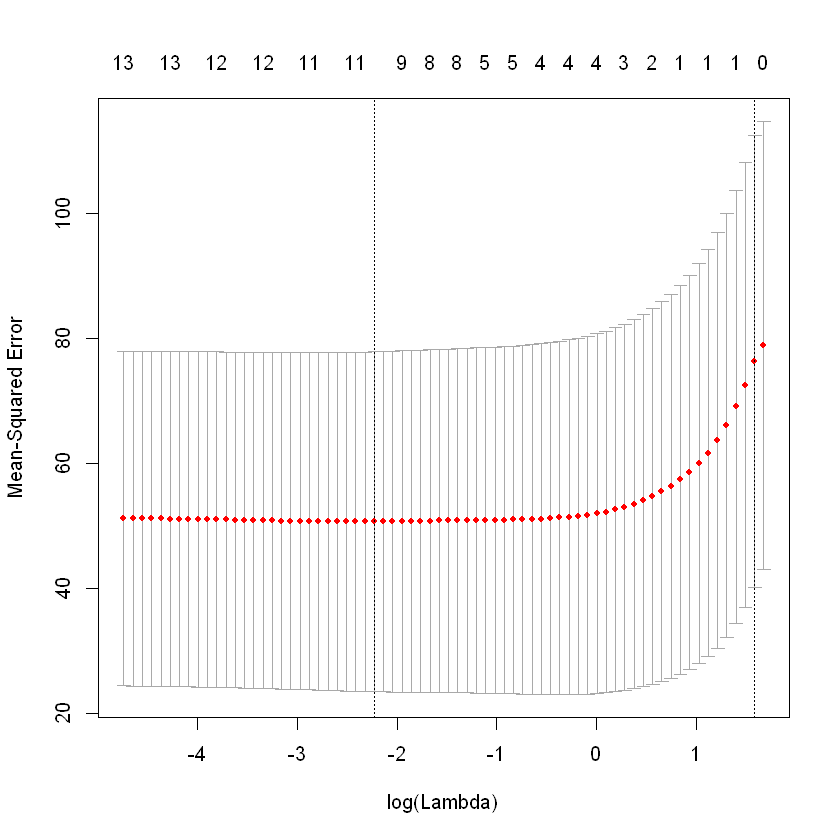

In [23]:
cv.out = cv.glmnet( MM, Y, alpha=1 )
plot( cv.out ) 
bestlam = cv.out$lambda.1se
lasso.mod = glmnet( MM, Y, alpha=1 )
Y_hat = predict( lasso.mod, s=bestlam, newx=model.matrix(crim ~ ., data=Boston_test))
MSE =mean((Boston_test$crim - Y_hat )^2)
print(sprintf("Lasso regression test MSE= %.3f", MSE))
print("lasso coefficients")
print(predict(lasso.mod, type="coefficients", s=bestlam))

Now, we try the PCR model by following what you have done in the first exercise.

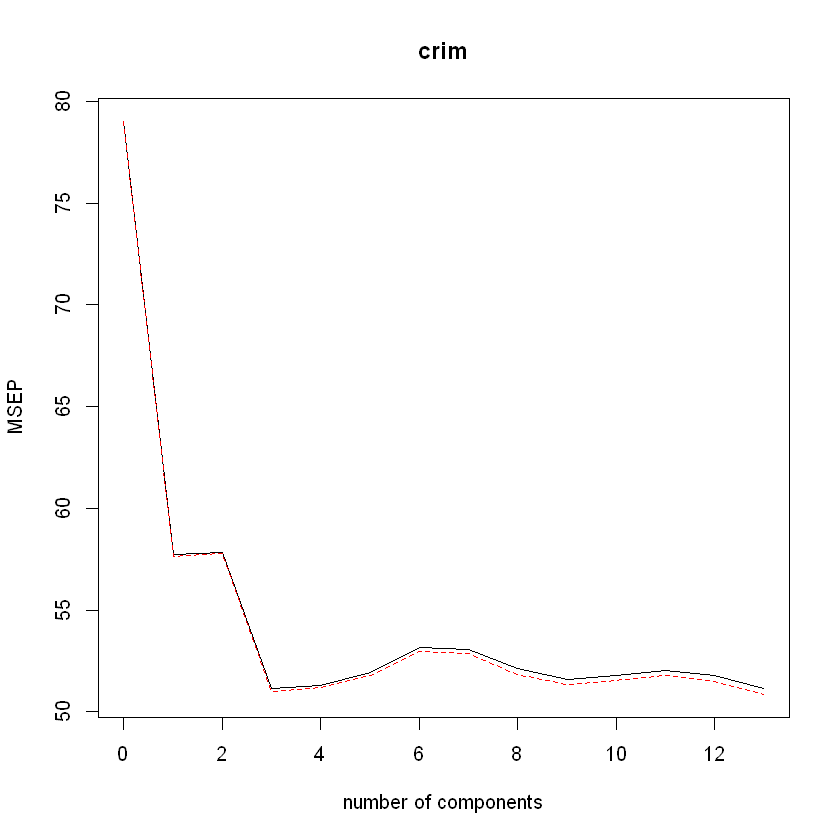

In [24]:
pcr.mod = pcr( crim ~ ., data=Boston_train, scale=TRUE, validation="CV" )
validationplot( pcr.mod, val.type="MSEP" ) 

The validation plot looks suggests that we should use 3 predictors.

In [25]:
ncomp = 3
Y_hat = predict(pcr.mod, Boston_test, ncomp=ncomp)
MSE = mean((Boston_test$crim - Y_hat )^2)
print(sprintf("PCR (with ncomp= %5d) test MSE= %10.3f", ncomp, MSE))

[1] "PCR (with ncomp=     3) test MSE=     40.049"


Finally, let's try to fit a PLS model.

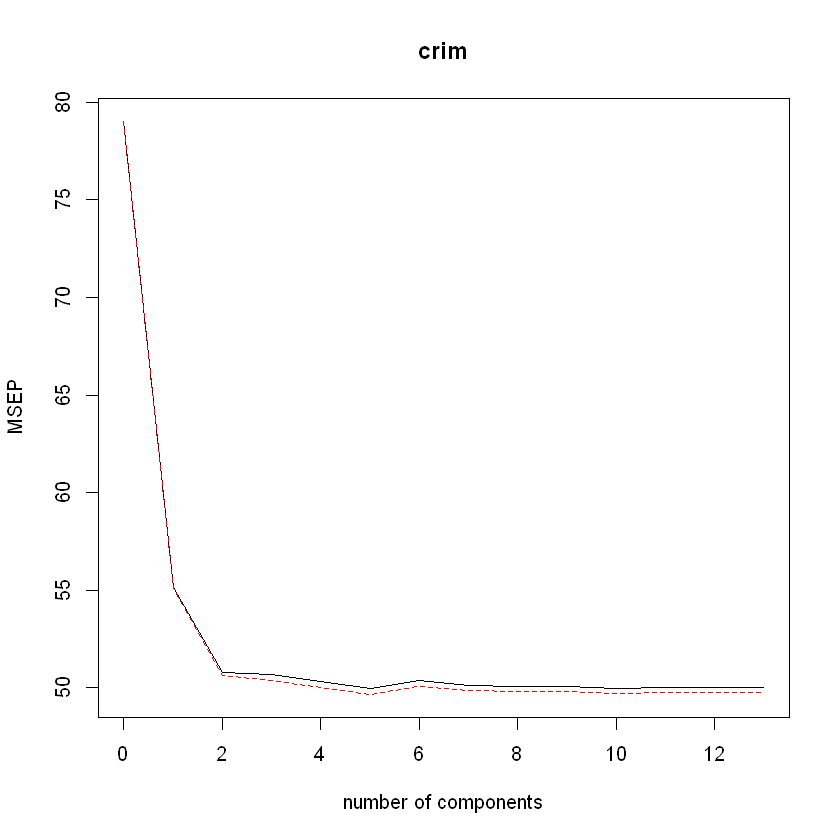

In [26]:
pls.mod = plsr( crim ~ ., data=Boston_train, scale=TRUE, validation="CV" )
validationplot( pls.mod, val.type="MSEP" ) 

The CV suggests the best $M$ is 5.

In [27]:
ncomp=5
Y_hat = predict( pls.mod, Boston_test, ncomp=ncomp)
MSE = mean((Boston_test$crim - Y_hat )^2) 
print(sprintf("PLS (with ncomp= %5d) test MSE= %10.3f", ncomp, MSE))

[1] "PLS (with ncomp=     5) test MSE=     35.258"


By looking at the test MSE, which model does give the lowest test MSE?